In [1]:
# ------------------------------------------define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
# ------------------------------------------jupyter magic config
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# ------------------------------------------ import helpers
# this should import glob, os, and some other standard libs to keep this cell clean
# local imports
import tensorflow as tf
tf.get_logger().setLevel('FATAL')

from src.utils.Notebook_imports import *
from src.utils.Utils_io import Console_and_file_logger, init_config
from src.data.Dataset import get_trainings_files
from src.data.Dataset import get_patients, get_patient
from src.data.Dataset import create_2d_slices_from_4d_volume_file
from src.data.Dataset import describe_sitk
from src.models.predict_4d_on_seg import predict_4d_on_2d_cv

from ipyfilechooser import FileChooser
from src.data.Generators import DataGenerator
import glob
import SimpleITK as sitk
import pandas as pd
Console_and_file_logger('temp')

search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/rvip_landmark_detection


2022-05-12 09:59:02,961 INFO -------------------- Start --------------------
2022-05-12 09:59:02,962 INFO Working directory: /mnt/ssd/git/rvip_landmark_detection.
2022-05-12 09:59:02,962 INFO Log file: ./logs/temp.log
2022-05-12 09:59:02,962 INFO Log level for console: INFO


# Collect a list of 4D CMR files for inference

In [3]:
# acdc 4d files
files_ = sorted(glob.glob('/mnt/ssd/data/acdc/2D/original/all/*/*4d.nii.gz'))
logging.info('4D files: {}'.format(len(files_)))

2022-05-12 09:59:49,405 INFO 4D files: 100


In [96]:
# tof 4d files
files_ = sorted(glob.glob('/mnt/ssd/data/tof/02_imported_4D_unfiltered/original/*clean.nrrd'))
logging.info('4D files: {}'.format(len(files_)))

2022-05-08 20:23:21,367 INFO 4D files: 278


# Predict 4D Masks based on a 2D segmentation model

In [4]:
exp = '/mnt/ssd/git/rvip_landmark_detection/exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/'
pred_path = predict_4d_on_2d_cv(path_to_exp=exp,
                                list_of_4d=files_,
                               export_suffix='pred_4d_cv')

2022-05-12 09:59:51,879 INFO found: 4 cfgs.
2022-05-12 09:59:51,879 INFO got 100 files for inference
2022-05-12 09:59:51,917 INFO expect 25 patients for validation in fold 0
2022-05-12 09:59:51,918 INFO 4d files filtered: 25
2022-05-12 09:59:51,920 INFO Create model


using tensorflow, need to monkey patch
tf.python.backend.slice overwritten by monkey patch
monkey patch failed, override methods
(None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-12 09:59:53,743 INFO loaded model weights as h5 file
2022-05-12 09:59:53,916 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-12 09:59:54,220 INFO x_sliced: 300, example: data/interim/patient001_4d_t0_z0_img.nrrd
2022-05-12 09:59:54,220 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-12 09:59:54,220 INFO Create DataGenerator
2022-05-12 09:59:54,221 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 300 
 Augment: False 
 Thread workers: 32
2022-05-12 09:59:54,550 INFO x_sliced: 300, example: data/interim/patient002_4d_t0_z0_img.nrrd
2022-05-12 09:59:54,551 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:09,245 INFO size: (208, 256, 10, 35)
2022-05-12 10:00:09,245 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:00:09,246 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:09,246 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:09,246 INFO pixel type: 32-bit float
2022-05-12 10:00:09,246 INFO number of pixel components: 1


(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:11,833 INFO size: (192, 256, 10, 30)
2022-05-12 10:00:11,834 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-12 10:00:11,834 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:11,834 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:11,835 INFO pixel type: 32-bit float
2022-05-12 10:00:11,835 INFO number of pixel components: 1
2022-05-12 10:00:13,958 INFO size: (216, 256, 8, 13)
2022-05-12 10:00:13,959 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:00:13,959 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:13,960 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:13,960 INFO pixel type: 32-bit float
2022-05-12 10:00:13,960 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:14,913 INFO size: (240, 256, 10, 30)
2022-05-12 10:00:14,914 INFO spacing: (1.6796875, 1.6796875, 10.0, 1.0)
2022-05-12 10:00:14,914 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:14,914 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:14,915 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:14,915 INFO number of pixel components: 1


(224, 224, 8, 13)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:17,071 INFO size: (200, 256, 7, 28)
2022-05-12 10:00:17,071 INFO spacing: (1.40625, 1.40625, 10.0, 1.0)
2022-05-12 10:00:17,072 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:17,072 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:17,073 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:17,073 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:18,586 INFO size: (192, 256, 11, 30)
2022-05-12 10:00:18,587 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:00:18,587 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:18,587 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:18,587 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:18,588 INFO number of pixel components: 1


(224, 224, 7, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 11, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:21,043 INFO size: (216, 256, 8, 35)
2022-05-12 10:00:21,043 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-12 10:00:21,044 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:21,044 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:21,044 INFO pixel type: 32-bit float
2022-05-12 10:00:21,044 INFO number of pixel components: 1


(224, 224, 8, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:23,313 INFO size: (276, 384, 8, 24)
2022-05-12 10:00:23,314 INFO spacing: (0.8333330154418945, 0.8333330154418945, 10.0, 1.0)
2022-05-12 10:00:23,314 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:23,314 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:23,315 INFO pixel type: 32-bit float
2022-05-12 10:00:23,315 INFO number of pixel components: 1
2022-05-12 10:00:24,736 INFO size: (154, 224, 6, 17)
2022-05-12 10:00:24,737 INFO spacing: (1.7857099771499634, 1.7857099771499634, 10.0, 1.0)
2022-05-12 10:00:24,737 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:24,738 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:24,738 INFO pixel type: 32-bit float
2022-05-12 10:00:24,739 INFO number of pixel components: 1


(224, 224, 8, 24)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:25,692 INFO size: (232, 256, 9, 35)
2022-05-12 10:00:25,692 INFO spacing: (1.7578125, 1.7578125, 10.0, 1.0)
2022-05-12 10:00:25,693 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:25,693 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:25,693 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:25,694 INFO number of pixel components: 1


(224, 224, 6, 17)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:27,994 INFO size: (256, 216, 7, 35)
2022-05-12 10:00:27,994 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:00:27,995 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:27,995 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:27,995 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:27,996 INFO number of pixel components: 1


(224, 224, 9, 35)
(1.2, 1.2, 10.0, 1)
(224, 224, 7, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:29,902 INFO size: (216, 256, 9, 30)
2022-05-12 10:00:29,903 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:00:29,903 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:29,903 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:29,904 INFO pixel type: 32-bit float
2022-05-12 10:00:29,904 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:31,972 INFO size: (216, 256, 9, 30)
2022-05-12 10:00:31,973 INFO spacing: (1.40625, 1.40625, 10.0, 1.0)
2022-05-12 10:00:31,973 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:31,974 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:31,974 INFO pixel type: 32-bit float
2022-05-12 10:00:31,974 INFO number of pixel components: 1
2022-05-12 10:00:33,979 INFO size: (216, 256, 9, 30)
2022-05-12 10:00:33,979 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:00:33,979 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:33,980 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:33,980 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:33,980 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:35,944 INFO size: (256, 216, 10, 30)
2022-05-12 10:00:35,944 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:00:35,945 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:35,945 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:35,946 INFO pixel type: 16-bit signed integer
2022-05-12 10:00:35,946 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:38,139 INFO size: (216, 256, 7, 30)
2022-05-12 10:00:38,139 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:00:38,140 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:38,140 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:38,140 INFO pixel type: 32-bit float
2022-05-12 10:00:38,141 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 7, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:39,892 INFO size: (256, 256, 8, 30)
2022-05-12 10:00:39,893 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:00:39,893 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:39,893 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:39,894 INFO pixel type: 32-bit float
2022-05-12 10:00:39,894 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:41,806 INFO size: (216, 256, 8, 30)
2022-05-12 10:00:41,806 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:00:41,806 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:41,807 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:41,807 INFO pixel type: 32-bit float
2022-05-12 10:00:41,807 INFO number of pixel components: 1
2022-05-12 10:00:43,629 INFO size: (154, 224, 17, 16)
2022-05-12 10:00:43,630 INFO spacing: (1.6517900228500366, 1.6517900228500366, 5.0, 1.0)
2022-05-12 10:00:43,630 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:43,630 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:43,631 INFO pixel type: 32-bit float
2022-05-12 10:00:43,631 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:45,640 INFO size: (224, 154, 16, 17)
2022-05-12 10:00:45,641 INFO spacing: (1.7857099771499634, 1.7857099771499634, 5.0, 1.0)
2022-05-12 10:00:45,641 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:45,641 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:45,642 INFO pixel type: 32-bit float
2022-05-12 10:00:45,642 INFO number of pixel components: 1


(224, 224, 17, 16)
(1.2, 1.2, 5.0, 1)
(224, 224, 16, 17)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:00:47,717 INFO size: (264, 288, 6, 30)
2022-05-12 10:00:47,718 INFO spacing: (1.4583300352096558, 1.4583300352096558, 10.0, 1.0)
2022-05-12 10:00:47,718 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:47,718 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:47,718 INFO pixel type: 32-bit float
2022-05-12 10:00:47,719 INFO number of pixel components: 1
2022-05-12 10:00:49,215 INFO size: (174, 208, 18, 15)
2022-05-12 10:00:49,215 INFO spacing: (1.6826900243759155, 1.6826900243759155, 5.0, 1.0)
2022-05-12 10:00:49,216 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:49,216 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:49,216 INFO pixel type: 32-bit float
2022-05-12 10:00:49,216 INFO number of pixel components: 1


(224, 224, 6, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:00:51,174 INFO size: (216, 256, 7, 22)
2022-05-12 10:00:51,175 INFO spacing: (1.25, 1.25, 10.0, 1.0)
2022-05-12 10:00:51,175 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:00:51,175 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:00:51,176 INFO pixel type: 32-bit float
2022-05-12 10:00:51,176 INFO number of pixel components: 1


(224, 224, 18, 15)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:00:52,284 INFO expect 25 patients for validation in fold 1
2022-05-12 10:00:52,285 INFO 4d files filtered: 25
2022-05-12 10:00:52,285 INFO Create model


(224, 224, 7, 22)
(1.2, 1.2, 10.0, 1)
(None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-12 10:00:52,898 INFO loaded model weights as h5 file
2022-05-12 10:00:53,075 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-12 10:00:53,382 INFO x_sliced: 280, example: data/interim/patient004_4d_t0_z0_img.nrrd
2022-05-12 10:00:53,382 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-12 10:00:53,383 INFO Create DataGenerator
2022-05-12 10:00:53,383 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 280 
 Augment: False 
 Thread workers: 32
2022-05-12 10:00:53,725 INFO x_sliced: 308, example: data/interim/patient006_4d_t0_z0_img.nrrd
2022-05-12 10:00:53,725 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 11, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:06,842 INFO size: (184, 256, 10, 30)
2022-05-12 10:01:06,842 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:06,842 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:06,843 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:06,843 INFO pixel type: 32-bit float
2022-05-12 10:01:06,843 INFO number of pixel components: 1
2022-05-12 10:01:09,027 INFO size: (216, 256, 9, 19)
2022-05-12 10:01:09,028 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:09,028 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:09,028 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:09,029 INFO pixel type: 32-bit float
2022-05-12 10:01:09,029 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 9, 19)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:10,568 INFO size: (216, 256, 11, 30)
2022-05-12 10:01:10,569 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-12 10:01:10,569 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:10,569 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:10,569 INFO pixel type: 32-bit float
2022-05-12 10:01:10,570 INFO number of pixel components: 1
2022-05-12 10:01:12,967 INFO size: (208, 256, 8, 28)
2022-05-12 10:01:12,968 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:12,968 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:12,968 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:12,969 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:12,969 INFO number of pixel components: 1


(224, 224, 11, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:14,689 INFO size: (216, 256, 10, 28)
2022-05-12 10:01:14,689 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:01:14,689 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:14,689 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:14,690 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:14,690 INFO number of pixel components: 1


(224, 224, 8, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:16,796 INFO size: (240, 256, 10, 30)
2022-05-12 10:01:16,797 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:16,797 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:16,797 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:16,798 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:16,798 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:19,017 INFO size: (216, 256, 7, 30)
2022-05-12 10:01:19,017 INFO spacing: (1.875, 1.875, 10.0, 1.0)
2022-05-12 10:01:19,017 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:19,018 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:19,018 INFO pixel type: 32-bit float
2022-05-12 10:01:19,018 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 7, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:20,767 INFO size: (208, 256, 9, 28)
2022-05-12 10:01:20,768 INFO spacing: (1.6406199932098389, 1.6406199932098389, 10.0, 1.0)
2022-05-12 10:01:20,768 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:20,768 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:20,769 INFO pixel type: 32-bit float
2022-05-12 10:01:20,769 INFO number of pixel components: 1
2022-05-12 10:01:22,655 INFO size: (256, 216, 9, 30)
2022-05-12 10:01:22,656 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:01:22,656 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:22,656 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:22,657 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:22,657 INFO number of pixel components: 1


(224, 224, 9, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:24,709 INFO size: (256, 216, 9, 30)
2022-05-12 10:01:24,710 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:24,710 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:24,710 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:24,710 INFO pixel type: 32-bit float
2022-05-12 10:01:24,711 INFO number of pixel components: 1
2022-05-12 10:01:26,731 INFO size: (216, 256, 8, 20)
2022-05-12 10:01:26,732 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-12 10:01:26,732 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:26,732 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:26,733 INFO pixel type: 32-bit float
2022-05-12 10:01:26,733 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 8, 20)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:28,540 INFO size: (428, 512, 8, 25)
2022-05-12 10:01:28,540 INFO spacing: (0.703125, 0.703125, 10.0, 1.0)
2022-05-12 10:01:28,541 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:28,541 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:28,541 INFO pixel type: 32-bit float
2022-05-12 10:01:28,541 INFO number of pixel components: 1


(224, 224, 8, 25)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:30,213 INFO size: (256, 216, 9, 30)
2022-05-12 10:01:30,214 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:01:30,214 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:30,215 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:30,215 INFO pixel type: 32-bit float
2022-05-12 10:01:30,215 INFO number of pixel components: 1
2022-05-12 10:01:32,240 INFO size: (216, 256, 10, 35)
2022-05-12 10:01:32,241 INFO spacing: (1.4453125, 1.4453125, 10.0, 1.0)
2022-05-12 10:01:32,241 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:32,241 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:32,242 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:32,242 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:34,829 INFO size: (240, 256, 9, 30)
2022-05-12 10:01:34,829 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:01:34,830 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:34,830 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:34,830 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:34,830 INFO number of pixel components: 1
2022-05-12 10:01:36,815 INFO size: (216, 256, 8, 30)
2022-05-12 10:01:36,815 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:36,815 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:36,816 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:36,816 INFO pixel type: 16-bit signed integer
2022-05-12 10:01:36,816 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:38,762 INFO size: (214, 256, 8, 25)
2022-05-12 10:01:38,762 INFO spacing: (1.40625, 1.40625, 10.0, 1.0)
2022-05-12 10:01:38,763 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:38,763 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:38,763 INFO pixel type: 32-bit float
2022-05-12 10:01:38,764 INFO number of pixel components: 1


(224, 224, 8, 25)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:40,429 INFO size: (216, 256, 9, 30)
2022-05-12 10:01:40,430 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:01:40,430 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:40,430 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:40,431 INFO pixel type: 32-bit float
2022-05-12 10:01:40,431 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:42,685 INFO size: (208, 256, 12, 35)
2022-05-12 10:01:42,685 INFO spacing: (1.3671900033950806, 1.3671900033950806, 5.0, 1.0)
2022-05-12 10:01:42,685 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:42,686 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:42,686 INFO pixel type: 32-bit float
2022-05-12 10:01:42,686 INFO number of pixel components: 1
2022-05-12 10:01:45,605 INFO size: (192, 256, 7, 19)
2022-05-12 10:01:45,605 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:01:45,606 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:45,606 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:45,606 INFO pixel type: 32-bit float
2022-05-12 10:01:45,607 INFO number of pixel components: 1


(224, 224, 12, 35)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:01:46,700 INFO size: (174, 208, 15, 15)
2022-05-12 10:01:46,700 INFO spacing: (1.6826900243759155, 1.6826900243759155, 5.0, 1.0)
2022-05-12 10:01:46,701 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:46,701 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:46,701 INFO pixel type: 32-bit float
2022-05-12 10:01:46,701 INFO number of pixel components: 1


(224, 224, 7, 19)
(1.2, 1.2, 10.0, 1)
(224, 224, 15, 15)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:01:48,491 INFO size: (216, 256, 8, 30)
2022-05-12 10:01:48,491 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-12 10:01:48,492 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:48,492 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:48,492 INFO pixel type: 32-bit float
2022-05-12 10:01:48,492 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:01:50,417 INFO size: (154, 224, 16, 19)
2022-05-12 10:01:50,417 INFO spacing: (1.7857099771499634, 1.7857099771499634, 5.0, 1.0)
2022-05-12 10:01:50,418 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:01:50,418 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:01:50,419 INFO pixel type: 32-bit float
2022-05-12 10:01:50,419 INFO number of pixel components: 1
2022-05-12 10:01:52,509 INFO expect 25 patients for validation in fold 2
2022-05-12 10:01:52,510 INFO 4d files filtered: 25
2022-05-12 10:01:52,510 INFO Create model


(224, 224, 16, 19)
(1.2, 1.2, 5.0, 1)
(None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-12 10:01:53,129 INFO loaded model weights as h5 file
2022-05-12 10:01:53,295 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-12 10:01:53,611 INFO x_sliced: 300, example: data/interim/patient003_4d_t0_z0_img.nrrd
2022-05-12 10:01:53,612 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-12 10:01:53,612 INFO Create DataGenerator
2022-05-12 10:01:53,613 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 300 
 Augment: False 
 Thread workers: 32
2022-05-12 10:01:53,902 INFO x_sliced: 300, example: data/interim/patient005_4d_t0_z0_img.nrrd
2022-05-12 10:01:53,902 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:06,410 INFO size: (208, 256, 10, 28)
2022-05-12 10:02:06,411 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:06,411 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:06,411 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:06,412 INFO pixel type: 32-bit float
2022-05-12 10:02:06,412 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:08,662 INFO size: (256, 216, 10, 30)
2022-05-12 10:02:08,663 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:02:08,663 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:08,663 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:08,664 INFO pixel type: 32-bit float
2022-05-12 10:02:08,664 INFO number of pixel components: 1
2022-05-12 10:02:10,881 INFO size: (208, 256, 8, 20)
2022-05-12 10:02:10,882 INFO spacing: (1.7578099966049194, 1.7578099966049194, 10.0, 1.0)
2022-05-12 10:02:10,882 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:10,882 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:10,882 INFO pixel type: 32-bit float
2022-05-12 10:02:10,882 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:12,176 INFO size: (216, 256, 9, 25)
2022-05-12 10:02:12,176 INFO spacing: (1.4453125, 1.4453125, 10.0, 1.0)
2022-05-12 10:02:12,177 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:12,177 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:12,177 INFO pixel type: 16-bit signed integer
2022-05-12 10:02:12,178 INFO number of pixel components: 1


(224, 224, 8, 20)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:13,911 INFO size: (256, 256, 9, 25)
2022-05-12 10:02:13,912 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:02:13,912 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:13,912 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:13,913 INFO pixel type: 16-bit signed integer
2022-05-12 10:02:13,913 INFO number of pixel components: 1


(224, 224, 9, 25)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:15,679 INFO size: (216, 256, 10, 35)
2022-05-12 10:02:15,679 INFO spacing: (1.4453125, 1.4453125, 10.0, 1.0)
2022-05-12 10:02:15,680 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:15,680 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:15,680 INFO pixel type: 16-bit signed integer
2022-05-12 10:02:15,680 INFO number of pixel components: 1


(224, 224, 9, 25)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:18,354 INFO size: (224, 256, 10, 30)
2022-05-12 10:02:18,354 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:18,355 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:18,355 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:18,355 INFO pixel type: 32-bit float
2022-05-12 10:02:18,356 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:20,735 INFO size: (208, 256, 10, 35)
2022-05-12 10:02:20,735 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-12 10:02:20,735 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:20,736 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:20,736 INFO pixel type: 32-bit float
2022-05-12 10:02:20,736 INFO number of pixel components: 1
2022-05-12 10:02:23,287 INFO size: (174, 224, 12, 13)
2022-05-12 10:02:23,288 INFO spacing: (1.9196399450302124, 1.9196399450302124, 6.5, 1.0)
2022-05-12 10:02:23,288 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:23,289 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:23,289 INFO pixel type: 32-bit float
2022-05-12 10:02:23,289 INFO number of pixel components: 1


(224, 224, 10, 35)
(1.2, 1.2, 10.0, 1)
(224, 224, 12, 13)
(1.2, 1.2, 6.5, 1)


2022-05-12 10:02:24,698 INFO size: (208, 256, 8, 35)
2022-05-12 10:02:24,699 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:24,699 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:24,699 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:24,700 INFO pixel type: 32-bit float
2022-05-12 10:02:24,700 INFO number of pixel components: 1
2022-05-12 10:02:26,834 INFO size: (248, 256, 10, 30)
2022-05-12 10:02:26,835 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:02:26,835 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:26,835 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:26,836 INFO pixel type: 16-bit signed integer
2022-05-12 10:02:26,836 INFO number of pixel components: 1


(224, 224, 8, 35)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:29,098 INFO size: (216, 256, 8, 30)
2022-05-12 10:02:29,098 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-12 10:02:29,098 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:29,099 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:29,099 INFO pixel type: 32-bit float
2022-05-12 10:02:29,100 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:31,091 INFO size: (216, 256, 9, 30)
2022-05-12 10:02:31,092 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:31,092 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:31,093 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:31,093 INFO pixel type: 32-bit float
2022-05-12 10:02:31,093 INFO number of pixel components: 1
2022-05-12 10:02:33,118 INFO size: (256, 176, 8, 35)
2022-05-12 10:02:33,118 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:02:33,119 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:33,119 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:33,119 INFO pixel type: 16-bit signed integer
2022-05-12 10:02:33,120 INFO number of pixel components: 1


(224, 224, 9, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:35,083 INFO size: (210, 224, 8, 30)
2022-05-12 10:02:35,083 INFO spacing: (1.875, 1.875, 10.0, 1.0)
2022-05-12 10:02:35,083 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:35,084 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:35,084 INFO pixel type: 16-bit signed integer
2022-05-12 10:02:35,084 INFO number of pixel components: 1


(224, 224, 8, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:36,938 INFO size: (208, 256, 6, 28)
2022-05-12 10:02:36,939 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:36,939 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:36,939 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:36,939 INFO pixel type: 32-bit float
2022-05-12 10:02:36,940 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 6, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:38,405 INFO size: (256, 256, 8, 30)
2022-05-12 10:02:38,406 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:38,406 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:38,406 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:38,407 INFO pixel type: 32-bit float
2022-05-12 10:02:38,407 INFO number of pixel components: 1
2022-05-12 10:02:40,200 INFO size: (216, 256, 6, 21)
2022-05-12 10:02:40,200 INFO spacing: (1.7578099966049194, 1.7578099966049194, 10.0, 1.0)
2022-05-12 10:02:40,201 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:40,201 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:40,201 INFO pixel type: 32-bit float
2022-05-12 10:02:40,201 INFO number of pixel components: 1


(224, 224, 8, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:41,403 INFO size: (208, 256, 6, 17)
2022-05-12 10:02:41,404 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:02:41,404 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:41,404 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:41,405 INFO pixel type: 32-bit float
2022-05-12 10:02:41,405 INFO number of pixel components: 1


(224, 224, 6, 21)
(1.2, 1.2, 10.0, 1)
(224, 224, 6, 17)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:02:42,574 INFO size: (184, 288, 15, 30)
2022-05-12 10:02:42,575 INFO spacing: (1.2152800559997559, 1.2152800559997559, 5.0, 1.0)
2022-05-12 10:02:42,575 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:42,575 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:42,575 INFO pixel type: 32-bit float
2022-05-12 10:02:42,576 INFO number of pixel components: 1
2022-05-12 10:02:45,634 INFO size: (154, 224, 7, 12)
2022-05-12 10:02:45,635 INFO spacing: (1.7857099771499634, 1.7857099771499634, 10.0, 1.0)
2022-05-12 10:02:45,635 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:45,636 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:45,636 INFO pixel type: 32-bit float
2022-05-12 10:02:45,636 INFO number of pixel components: 1


(224, 224, 15, 30)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:02:46,394 INFO size: (208, 174, 10, 14)
2022-05-12 10:02:46,394 INFO spacing: (1.6826900243759155, 1.6826900243759155, 5.0, 1.0)
2022-05-12 10:02:46,394 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:46,395 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:46,395 INFO pixel type: 32-bit float
2022-05-12 10:02:46,395 INFO number of pixel components: 1


(224, 224, 7, 12)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 14)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:02:47,746 INFO size: (216, 304, 8, 34)
2022-05-12 10:02:47,746 INFO spacing: (1.315790057182312, 1.315790057182312, 10.0, 1.0)
2022-05-12 10:02:47,747 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:02:47,747 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:02:47,747 INFO pixel type: 32-bit float
2022-05-12 10:02:47,747 INFO number of pixel components: 1
2022-05-12 10:02:49,637 INFO expect 25 patients for validation in fold 3
2022-05-12 10:02:49,638 INFO 4d files filtered: 25
2022-05-12 10:02:49,638 INFO Create model


(224, 224, 8, 34)
(1.2, 1.2, 10.0, 1)
(None, 224, 224, 1)


/home/sven/anaconda3/envs/dcmr/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-12 10:02:50,243 INFO loaded model weights as h5 file
2022-05-12 10:02:50,313 INFO found 25 4D files, will return one generator per file with t x z slices
2022-05-12 10:02:50,459 INFO x_sliced: 160, example: data/interim/patient007_4d_t0_z0_img.nrrd
2022-05-12 10:02:50,460 INFO inference mode, no masks given, will use x as placeholder for y in fix processing
2022-05-12 10:02:50,460 INFO Create DataGenerator
2022-05-12 10:02:50,460 INFO Datagenerator created with: 
 shape: [224, 224]
 spacing: [1.2, 1.2]
 batchsize: 1
 Scaler: MinMax
 Images: 160 
 Augment: False 
 Thread workers: 32
2022-05-12 10:02:50,731 INFO x_sliced: 280, example: data/interim/patient008_4d_t0_z0_img.nrrd
2022-05-12 10:02:50,731 INFO inference mode, no masks given, will use x as placeholder for y in f

(224, 224, 10, 16)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:01,861 INFO size: (216, 256, 9, 15)
2022-05-12 10:03:01,861 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-12 10:03:01,862 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:01,862 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:01,862 INFO pixel type: 32-bit float
2022-05-12 10:03:01,863 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)
(224, 224, 9, 15)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:03,109 INFO size: (216, 256, 10, 30)
2022-05-12 10:03:03,109 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-12 10:03:03,110 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:03,110 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:03,110 INFO pixel type: 32-bit float
2022-05-12 10:03:03,111 INFO number of pixel components: 1
2022-05-12 10:03:05,341 INFO size: (256, 216, 9, 21)
2022-05-12 10:03:05,342 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:03:05,342 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:05,342 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:05,343 INFO pixel type: 32-bit float
2022-05-12 10:03:05,343 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:06,847 INFO size: (216, 256, 10, 30)
2022-05-12 10:03:06,848 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:03:06,848 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:06,848 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:06,849 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:06,849 INFO number of pixel components: 1


(224, 224, 9, 21)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:09,020 INFO size: (224, 256, 10, 28)
2022-05-12 10:03:09,021 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:03:09,021 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:09,021 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:09,021 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:09,022 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:11,082 INFO size: (216, 256, 10, 30)
2022-05-12 10:03:11,082 INFO spacing: (1.484375, 1.484375, 10.0, 1.0)
2022-05-12 10:03:11,083 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:11,083 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:11,083 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:11,083 INFO number of pixel components: 1


(224, 224, 10, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:13,299 INFO size: (216, 256, 10, 30)
2022-05-12 10:03:13,300 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:03:13,300 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:13,300 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:13,301 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:13,301 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:15,696 INFO size: (208, 256, 13, 28)
2022-05-12 10:03:15,697 INFO spacing: (1.6796900033950806, 1.6796900033950806, 5.0, 1.0)
2022-05-12 10:03:15,697 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:15,697 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:15,697 INFO pixel type: 32-bit float
2022-05-12 10:03:15,698 INFO number of pixel components: 1


(224, 224, 13, 28)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:03:18,398 INFO size: (256, 208, 9, 22)
2022-05-12 10:03:18,398 INFO spacing: (1.6796900033950806, 1.6796900033950806, 10.0, 1.0)
2022-05-12 10:03:18,399 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:18,399 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:18,399 INFO pixel type: 32-bit float
2022-05-12 10:03:18,400 INFO number of pixel components: 1


(224, 224, 9, 22)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:20,044 INFO size: (208, 256, 8, 28)
2022-05-12 10:03:20,045 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:03:20,045 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:20,046 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:20,046 INFO pixel type: 32-bit float
2022-05-12 10:03:20,046 INFO number of pixel components: 1


(224, 224, 8, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:21,899 INFO size: (224, 256, 10, 30)
2022-05-12 10:03:21,900 INFO spacing: (1.6406199932098389, 1.6406199932098389, 10.0, 1.0)
2022-05-12 10:03:21,900 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:21,900 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:21,901 INFO pixel type: 32-bit float
2022-05-12 10:03:21,901 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:24,204 INFO size: (216, 256, 7, 30)
2022-05-12 10:03:24,204 INFO spacing: (1.3671900033950806, 1.3671900033950806, 10.0, 1.0)
2022-05-12 10:03:24,204 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:24,205 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:24,205 INFO pixel type: 32-bit float
2022-05-12 10:03:24,205 INFO number of pixel components: 1
2022-05-12 10:03:25,890 INFO size: (256, 216, 9, 25)
2022-05-12 10:03:25,890 INFO spacing: (1.4843800067901611, 1.4843800067901611, 10.0, 1.0)
2022-05-12 10:03:25,890 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:25,891 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:25,891 INFO pixel type: 32-bit float
2022-05-12 10:03:25,891 INFO number of pixel components: 1


(224, 224, 7, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:27,601 INFO size: (256, 216, 10, 30)
2022-05-12 10:03:27,602 INFO spacing: (1.3671875, 1.3671875, 10.0, 1.0)
2022-05-12 10:03:27,602 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:27,602 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:27,602 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:27,603 INFO number of pixel components: 1


(224, 224, 9, 25)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:29,800 INFO size: (256, 208, 7, 28)
2022-05-12 10:03:29,800 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:03:29,800 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:29,800 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:29,801 INFO pixel type: 32-bit float
2022-05-12 10:03:29,801 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:31,325 INFO size: (192, 256, 10, 30)
2022-05-12 10:03:31,326 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:03:31,326 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:31,326 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:31,327 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:31,327 INFO number of pixel components: 1


(224, 224, 7, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:33,515 INFO size: (208, 256, 7, 35)
2022-05-12 10:03:33,515 INFO spacing: (1.640625, 1.640625, 10.0, 1.0)
2022-05-12 10:03:33,515 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:33,516 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:33,516 INFO pixel type: 16-bit signed integer
2022-05-12 10:03:33,517 INFO number of pixel components: 1


(224, 224, 10, 30)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:35,372 INFO size: (168, 224, 14, 14)
2022-05-12 10:03:35,372 INFO spacing: (1.7857099771499634, 1.7857099771499634, 5.0, 1.0)
2022-05-12 10:03:35,372 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:35,373 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:35,373 INFO pixel type: 32-bit float
2022-05-12 10:03:35,374 INFO number of pixel components: 1


(224, 224, 7, 35)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:36,966 INFO size: (256, 184, 8, 28)
2022-05-12 10:03:36,967 INFO spacing: (1.4453099966049194, 1.4453099966049194, 10.0, 1.0)
2022-05-12 10:03:36,967 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:36,967 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:36,968 INFO pixel type: 32-bit float
2022-05-12 10:03:36,968 INFO number of pixel components: 1


(224, 224, 14, 14)
(1.2, 1.2, 5.0, 1)
(224, 224, 8, 28)
(1.2, 1.2, 10.0, 1)


2022-05-12 10:03:38,838 INFO size: (224, 154, 16, 25)
2022-05-12 10:03:38,839 INFO spacing: (1.6517900228500366, 1.6517900228500366, 5.0, 1.0)
2022-05-12 10:03:38,839 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:38,839 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:38,839 INFO pixel type: 32-bit float
2022-05-12 10:03:38,840 INFO number of pixel components: 1
2022-05-12 10:03:41,612 INFO size: (180, 224, 8, 16)
2022-05-12 10:03:41,613 INFO spacing: (1.5625, 1.5625, 10.0, 1.0)
2022-05-12 10:03:41,613 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:41,614 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:41,614 INFO pixel type: 32-bit float
2022-05-12 10:03:41,614 INFO number of pixel components: 1


(224, 224, 16, 25)
(1.2, 1.2, 5.0, 1)


2022-05-12 10:03:42,745 INFO size: (180, 224, 10, 30)
2022-05-12 10:03:42,745 INFO spacing: (1.5625, 1.5625, 7.0, 1.0)
2022-05-12 10:03:42,746 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:42,746 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:42,746 INFO pixel type: 32-bit float
2022-05-12 10:03:42,746 INFO number of pixel components: 1


(224, 224, 8, 16)
(1.2, 1.2, 10.0, 1)
(224, 224, 10, 30)
(1.2, 1.2, 7.0, 1)


2022-05-12 10:03:45,071 INFO size: (180, 224, 14, 30)
2022-05-12 10:03:45,071 INFO spacing: (1.5625, 1.5625, 5.0, 1.0)
2022-05-12 10:03:45,072 INFO origin: (0.0, 0.0, 0.0, 0.0)
2022-05-12 10:03:45,072 INFO direction: (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0)
2022-05-12 10:03:45,072 INFO pixel type: 32-bit float
2022-05-12 10:03:45,072 INFO number of pixel components: 1


(224, 224, 14, 30)
(1.2, 1.2, 5.0, 1)


# Load the predicted 4D masks

In [5]:
print(pred_path)
pattern = os.path.join(pred_path, '*msk.nrrd')
print(pattern)
files_pred_4d = list(sorted(glob.glob(pattern)))
print(len(files_pred_4d))

exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv
exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv/*msk.nrrd
100


In [6]:
# load one 4D file and calulate the volume in ml
@interact
def calc_vol(patient=(0,len(files_pred_4d)-1), label=[0,1,2,3]):
    global nda, gen_patient
    f = files_pred_4d[patient]
    logging.info(os.path.basename(f))
    temp = sitk.ReadImage(f)
    describe_sitk(temp)
    spacing = temp.GetSpacing()
    nda = sitk.GetArrayFromImage(temp)
    voxels = (nda==label).sum(axis=(1,2,3))
    voxel_size = spacing[0]*spacing[1]*spacing[2]
    logging.info('size of one voxel: {:3.2f}'.format(voxel_size))
    cardiac_volumes = (voxels*voxel_size)/1000
    #print(lv_voxels)
    plt.plot(cardiac_volumes);plt.show()
    print('ES according to argmin: {}'.format(np.argmin(cardiac_volumes)))
    print('ED according to argmax: {}'.format(np.argmax(cardiac_volumes)))

interactive(children=(IntSlider(value=49, description='patient', max=99), Dropdown(description='label', option…

In [7]:
from src.visualization.Visualize import show_2D_or_3D
@interact
def show_preds(t= (0,nda.shape[0]-1), z=(0,nda.shape[1]-1)):
    global nda
    logging.info(nda.shape)
    plt.imshow(nda[t][z])
    plt.show()

interactive(children=(IntSlider(value=14, description='t', max=29), IntSlider(value=4, description='z', max=9)…

In [39]:
files_pred_4d[0]

'exp/seg/baseline_spacing1_2_dim224_rot_shift_hist/2022-05-05_23_33/pred_4d_cv/patient001_4d_msk.nrrd'

In [8]:
# Calc the LV volume per 3D volume and predict the ED/ES phase
# Merge the prediction with the gt
# Calc the pFD per ED/ES
# Calc the Accuracy per ED/ES
from src.data.Dataset import predict_phase_from_vol
import pandas as pd
dataset = 'acdc' # or 'tof' --> different patient id extraction

df_merge = predict_phase_from_vol(filenames=files_pred_4d,dataset=dataset)

In [9]:
def calc_cycle_diff(pred, gt, length):
    lower = min(pred,gt)
    upper = max(pred,gt)
    diff = upper-lower
    cycle_diff = abs(length-upper+lower)
    return min(diff,cycle_diff)

df_merge['ED'] = df_merge.apply(lambda x : calc_cycle_diff(x['ed_idxs'], x['ED#'], x['cycle_len']), axis=1)
df_merge['ES'] = df_merge.apply(lambda x : calc_cycle_diff(x['es_idxs'], x['ES#'], x['cycle_len']), axis=1)

In [44]:
df_merge.to_csv(os.path.join(exp,'{}_vol_pred.csv'.format(dataset)))

In [49]:
import matplotlib.pyplot as plt
dfs = {}
dfs['df_base'] = df_merge
dfs['df_center'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/center/phaseloss0_2lstm32_tof/2022-03-17_15_39/cfd.csv')
dfs['df_lv'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/lv/phaseloss0_2lstm32_tof/2022-03-16_17_20/cfd.csv')
dfs['df_sep'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/septum/phaseloss0_2lstm32_tof/2022-03-16_15_27/cfd.csv')
@interact
def calc_acc(dataframe = dfs.keys(),threshold=(0,10,1)):
    
    plt.rcParams.update({'font.size': 22})
    fig,axes = plt.subplots(1,2,figsize=(14,5))
    ax1, ax2 = axes
    
    df = dfs.get(dataframe)
    print('{:1.2f}'.format((df['ED']<=threshold).sum()/len(df)))
    print('{:1.2f}'.format((df['ES']<=threshold).sum()/len(df)))
    threshs = list(range(10))
    ed_acc = [(df['ED']<=t).sum()/len(df) for t in threshs]
    es_acc = [(df['ES']<=t).sum()/len(df) for t in threshs]
    
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)
    ax1.legend(['vol', 'center', 'lv', 'sep'])
    ax2.legend(['vol', 'center', 'lv', 'sep'])
    ax1.set_xlabel('Threshold')
    ax2.set_xlabel('Threshold')
    ax1.set_ylabel('Accuracy phase ED')
    ax2.set_ylabel('Accuracy phase ES')
    ax1.set_ylim(0.7,1.01)
    ax2.set_ylim(0.7,1.01)
    plt.tight_layout()
    plt.show()
    return df.describe()

interactive(children=(Dropdown(description='dataframe', options=('df_base', 'df_center', 'df_lv', 'df_sep'), v…

# Compare the threshold vs acc plots per experiment

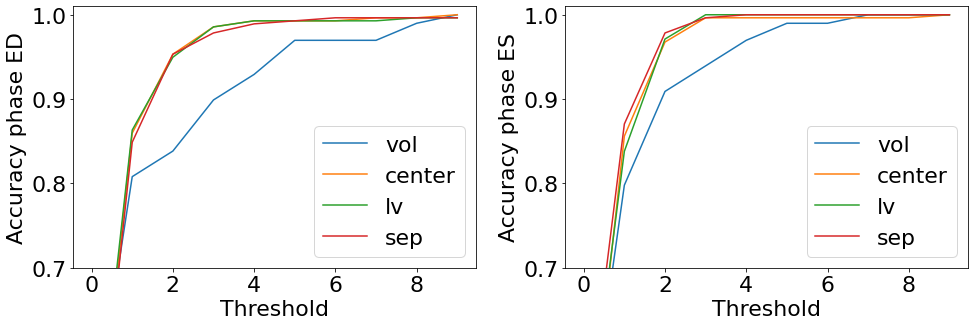

In [47]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig,axes = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = axes

threshs = list(range(10))
ed_accs = []
es_accs = []
for df_ in dfs.values():
    ed_accs.append([(df_['ED']<=t).sum()/len(df_) for t in threshs])
    es_accs.append([(df_['ES']<=t).sum()/len(df_) for t in threshs])
    
for ed_acc,es_acc in zip(ed_accs,es_accs):
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)

ax1.legend(['vol', 'center', 'lv', 'sep'])
ax2.legend(['vol', 'center', 'lv', 'sep'])
ax1.set_xlabel('Threshold')
ax2.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy phase ED')
ax2.set_ylabel('Accuracy phase ES')
ax1.set_ylim(0.7,1.01)
ax2.set_ylim(0.7,1.01)
plt.tight_layout()

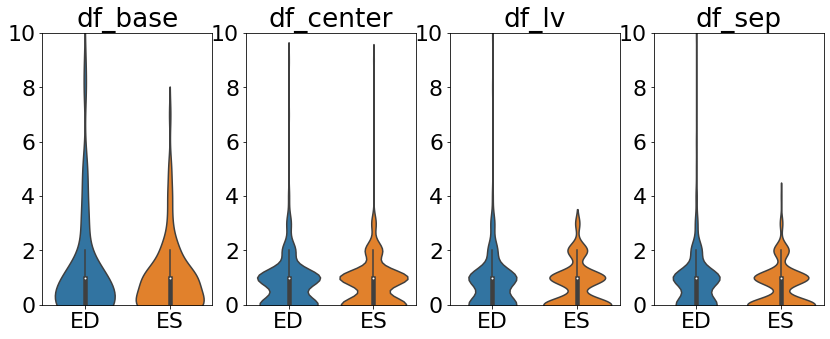

In [65]:
import seaborn as sb
fig,axes = plt.subplots(1,len(dfs.values()),figsize=(14,5))
for i, df_ in enumerate(dfs.values()):
    ax = axes[i]
    title = list(dfs.keys())[i]
    _ = ax.set_ylim(0,10)
    _ = ax.set_title(title)
    _ = sb.violinplot(data=df_[['ED','ES']], ax=ax)

# ACDC

In [14]:
import matplotlib.pyplot as plt
dfs_acdc = {}
dfs_acdc['df_base'] = df_merge
dfs_acdc['df_center'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/center/phaseloss0_2lstm32_acdc/2022-03-16_13_26/cfd.csv')
dfs_acdc['df_lv'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/lv/phaseloss0_2lstm32_acdc/2022-03-16_19_34/cfd.csv')
dfs_acdc['df_sep'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/septum/phaseloss0_2lstm32_acdc/2022-03-16_15_27/cfd.csv')
dfs_acdc['df_mse'] = pd.read_csv('/mnt/sds/sd20i001/sven/code/dynamic-cmr-models/exp/phasereg_v3/roll2/mse/phaseloss0_2lstm32_acdc/2022-04-01_11_49/cfd.csv')
@interact
def calc_acc(dataframe = dfs_acdc.keys(),threshold=(0,10,1)):
    
    plt.rcParams.update({'font.size': 22})
    fig,axes = plt.subplots(1,2,figsize=(14,5))
    ax1, ax2 = axes
    
    df = dfs_acdc.get(dataframe)
    print('{:1.2f}'.format((df['ED']<=threshold).sum()/len(df)))
    print('{:1.2f}'.format((df['ES']<=threshold).sum()/len(df)))
    threshs = list(range(10))
    ed_acc = [(df['ED']<=t).sum()/len(df) for t in threshs]
    es_acc = [(df['ES']<=t).sum()/len(df) for t in threshs]
    
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)
    ax1.legend(['vol', 'center', 'lv', 'sep'])
    ax2.legend(['vol', 'center', 'lv', 'sep'])
    ax1.set_xlabel('Threshold')
    ax2.set_xlabel('Threshold')
    ax1.set_ylabel('Accuracy phase ED')
    ax2.set_ylabel('Accuracy phase ES')
    ax1.set_ylim(0.7,1.01)
    ax2.set_ylim(0.7,1.01)
    plt.tight_layout()
    plt.show()
    return df.describe()

interactive(children=(Dropdown(description='dataframe', options=('df_base', 'df_center', 'df_lv', 'df_sep', 'd…

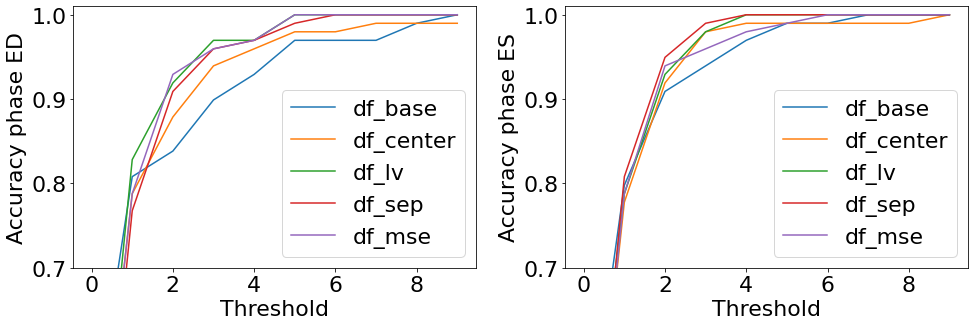

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig,axes = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = axes

threshs = list(range(10))
ed_accs = []
es_accs = []
for df_ in dfs_acdc.values():
    ed_accs.append([(df_['ED']<=t).sum()/len(df_) for t in threshs])
    es_accs.append([(df_['ES']<=t).sum()/len(df_) for t in threshs])
    
for ed_acc,es_acc in zip(ed_accs,es_accs):
    ax1.plot(threshs, ed_acc)
    ax2.plot(threshs, es_acc)

ax1.legend(list(dfs_acdc.keys()))
ax2.legend(list(dfs_acdc.keys()))
ax1.set_xlabel('Threshold')
ax2.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy phase ED')
ax2.set_ylabel('Accuracy phase ES')
ax1.set_ylim(0.7,1.01)
ax2.set_ylim(0.7,1.01)
plt.tight_layout()

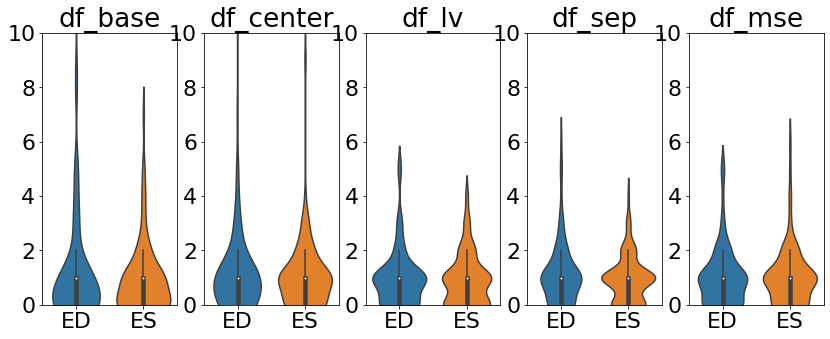

In [16]:
import seaborn as sb
fig,axes = plt.subplots(1,len(dfs_acdc.values()),figsize=(14,5))
for i, df_ in enumerate(dfs_acdc.values()):
    ax = axes[i]
    title = list(dfs_acdc.keys())[i]
    _ = ax.set_ylim(0,10)
    _ = ax.set_title(title)
    _ = sb.violinplot(data=df_[['ED','ES']], ax=ax)
plt.tight_layout()